In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

pd.set_option("display.max_columns", 100)

In [2]:
xqrs = pd.read_csv('../to_csv/ml_data/xqrs_clean_key_features.csv')
xqrs.head(10)

,Key,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
0,train_01_tcp_ar_8643_s002_t005,0.0,0.0,665.457589,1.942364,1.532157,0.0,0.0,0.0,0.000000,1.532157,664.06250,3.90625,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,train_01_tcp_ar_8643_s002_t005,1.0,10000.0,672.135417,11.762073,11.504201,0.0,0.0,1.0,6.666667,11.718750,675.78125,46.87500,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,train_01_tcp_ar_8643_s002_t005,2.0,20000.0,657.031250,10.460751,9.002380,0.0,0.0,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,train_01_tcp_ar_8643_s002_t005,3.0,30000.0,660.677083,2.499767,1.786586,0.0,0.0,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,train_01_tcp_ar_8643_s002_t005,4.0,40000.0,663.330078,6.723404,2.240189,0.0,0.0,0.0,0.000000,2.470529,664.06250,15.62500,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,train_01_tcp_ar_8643_s002_t005,5.0,50000.0,674.665179,3.884728,2.403846,0.0,0.0,0.0,0.000000,2.422553,675.78125,11.71875,0.003591,0.005758,88.935746,89.824561,88.275862,0.494526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,train_01_tcp_ar_8643_s002_t005,6.0,60000.0,657.812500,6.229039,6.537597,0.0,0.0,1.0,6.666667,6.684793,660.15625,27.34375,0.010162,0.009469,91.219235,94.233129,90.352941,0.856322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,train_01_tcp_ar_8643_s002_t005,7.0,70000.0,669.531250,3.234682,1.366903,0.0,0.0,0.0,0.000000,1.476424,671.87500,7.81250,0.002205,0.004831,89.616896,90.352941,89.302326,0.419941,NaN,NaN,NaN,NaN,2.936598,2.881787,138.886639,0.580514,4.026349,11.823770,2.936598,0.0
8,train_01_tcp_ar_8643_s002_t005,8.0,80000.0,658.203125,7.812500,7.795120,0.0,0.0,1.0,6.250000,8.068715,660.15625,31.25000,0.012259,0.011869,91.169834,95.403727,90.887574,1.093187,NaN,NaN,NaN,NaN,5.546411,2.391289,204.956989,0.555592,1.665631,9.238271,5.546411,0.0
9,train_01_tcp_ar_8643_s002_t005,9.0,90000.0,660.937500,10.768788,8.300488,0.0,0.0,1.0,6.666667,8.672026,664.06250,42.96875,0.013121,0.016293,90.803629,96.000000,89.824561,1.492422,NaN,NaN,NaN,NaN,5.571618,2.374407,202.383804,0.416829,1.629870,9.081015,5.571618,0.0


In [3]:
params = {}
for cols in xqrs.columns.tolist()[3:]:
    params[cols] = [lambda x: x.isnull().sum(), 
                    lambda x: x.count() + x.isnull().sum(), 
                    lambda x: (x.isnull().sum() / (x.count() + x.isnull().sum())) * 100]

In [4]:
count_nan_by_key = xqrs[['Key'] + xqrs.columns.tolist()[3:]]\
                                              .groupby('Key')\
                                              .agg(params)\
                                              .rename(columns={'<lambda_0>': 'NaN',
                                                               '<lambda_1>': 'total',
                                                               '<lambda_2>': '%'})

In [5]:
count_nan_by_key.shape

(3268, 84)

In [6]:
total = np.zeros(3268,)
i = 0
for cols in xqrs.columns.tolist()[3:]:
    sub_total = []
    for index, row in count_nan_by_key[(cols, '%')].iteritems():
        sub_total.append(row)
    i += 1
    total = np.add(total, sub_total)


total = total / 28

In [7]:
count_nan_by_key[('Total', 'Percent')] = total

In [8]:
count_nan_by_key[count_nan_by_key[('Total', 'Percent')] < 2].sort_values(('Total', 'Percent'))

n_01_tcp_ar_8480_s004_t001     268.0  0.000000    0.0  268.0  0.000000   
train_02_tcp_le_2126_s001_t000     254.0  0.000000    0.0  254.0  0.000000   
dev_01_tcp_ar_9578_s011_t008       252.0  0.000000    0.0  252.0  0.000000   
train_01_tcp_ar_7032_s008_t000     245.0  0.000000    0.0  245.0  0.000000   
train_02_tcp_le_5411_s002_t000     244.0  0.000000    0.0  244.0  0.000000   
dev_02_tcp_le_5943_s001_t000       280.0  0.000000    0.0  280.0  0.000000   
dev_02_tcp_le_1770_s003_t000       237.0  0.000000    0.0  237.0  0.000000   
train_01_tcp_ar_10969_s008_t001    239.0  0.000000    0.0  239.0  0.000000   
train_01_tcp_ar_1482_s004_t001     346.0  0.000000    0.0  346.0  0.000000   
train_01_tcp_ar_10489_s002_t001    232.0  0.000000    0.0  232.0  0.000000   
train_02_tcp_le_499_s002_t002      235.0  0.000000    0.0  235.0  0.000000   
train_01_tcp_ar_8164_s004_t003     225.0  0.000000    0.0  225.0  0.000000   
train_01_tcp_ar_8552_s007_t004     260.0  0.000000    0.0  260.0  0.000000   
train_01_tcp_ar_8476_s007_t001     212.0  0.000000    0.0  212.0  0.000000   
train_01_tcp_ar_11869_s001_t004    211.0  0.000000    0.0  211.0  0.000000   
train_01_tcp_ar_11870_s005_t002    235.0  0.425532    1.0  235.0  0.425532   
dev_01_tcp_ar_9578_s017_t004       206.0  0.000000    0.0  206.0  0.000000   
train_03_tcp_ar_a_13112_s002_t001  272.0  0.000000    0.0  272.0  0.000000   

                                  std_hr                     lf         \
                                     NaN  total         %   NaN  total   
Key                                                                      
train_02_tcp_le_1690_s001_t000       0.0  351.0  0.000000  16.0  351.0   
dev_01_tcp_ar_9842_s002_t001         0.0  341.0  0.000000  16.0  341.0   
dev_01_tcp_ar_9578_s021_t001         0.0  341.0  0.000000  16.0  341.0   
dev_01_tcp_ar_8544_s002_t005         0.0  312.0  0.000000  16.0  312.0   
train_01_tcp_ar_11596_s002_t001      1.0  357.0  0.280112  17.0  357.0   
train_01_tcp_ar_10209_s008_t000      0.0  303.0  0.000000  16.0  303.0   
train_01_tcp_ar_8480_s002_t004       0.0  281.0  0.000000  16.0  281.0   
train_01_tcp_ar_8480_s004_t001       0.0  268.0  0.000000  16.0  268.0   
train_02_tcp_le_2126_s001_t000       0.0  254.0  0.000000  16.0  254.0   
dev_01_tcp_ar_9578_s011_t008         0.0  252.0  0.000000  16.0  252.0   
train_01_tcp_ar_7032_s008_t000       0.0  245.0  0.000000  16.0  245.0   
train_02_tcp_le_5411_s002_t000       0.0  244.0  0.000000  16.0  244.0   
dev_02_tcp_le_5943_s001_t000         1.0  280.0  0.357143  17.0  280.0   
dev_02_tcp_le_1770_s003_t000         0.0  237.0  0.000000  16.0  237.0   
train_01_tcp_ar_10969_s008_t001      0.0  239.0  0.000000  16.0  239.0   
train_01_tcp_ar_1482_s004_t001       3.0  346.0  0.867052  19.0  346.0   
train_01_tcp_ar_10489_s002_t001      0.0  232.0  0.000000  16.0  232.0   
train_02_tcp_le_499_s002_t002        0.0  235.0  0.000000  16.0  235.0   
train_01_tcp_ar_8164_s004_t003       0.0  225.0  0.000000  16.0  225.0   
train_01_tcp_ar_8552_s007_t004       2.0  260.0  0.769231  17.0  260.0   
train_01_tcp_ar_8476_s007_t001       0.0  212.0  0.000000  16.0  212.0   
train_01_tcp_ar_11869_s001_t004      0.0  211.0  0.000000  16.0  211.0   
train_01_tcp_ar_11870_s005_t002      1.0  235.0  0.425532  16.0  235.0   
dev_01_tcp_ar_9578_s017_t004         0.0  206.0  0.000000  16.0  206.0   
train_03_tcp_ar_a_13112_s002_t001    2.0  272.0  0.735294  18.0  272.0   

                                               hf                    vlf  \
                                          %   NaN  total         %   NaN   
Key                                                                        
train_02_tcp_le_1690_s001_t000     4.558405  16.0  351.0  4.558405  16.0   
dev_01_tcp_ar_9842_s002_t001       4.692082  16.0  341.0  4.692082  16.0   
dev_01_tcp_ar_9578_s021_t001       4.692082  16.0  341.0  4.692082  16.0   
dev_01_tcp_ar_8544_s002_t005       5.128205  16.0  312.0  5.128205  16

In [9]:
crisis = xqrs[['Key', 'label']].groupby('Key').agg(lambda x: (x != 0).sum())

In [10]:
count_nan_by_key[('Total', 'Crisis')] = crisis.label.values

In [11]:
count_nan_by_key[(count_nan_by_key[('Total', 'Percent')] < 2) & (count_nan_by_key[('Total', 'Crisis')] > 1)].sort_values(('Total', 'Percent'))

mean_nni                  sdnn         \
                                     NaN  total         %  NaN  total   
Key                                                                     
dev_01_tcp_ar_9578_s021_t001         0.0  341.0  0.000000  0.0  341.0   
dev_01_tcp_ar_9842_s002_t001         0.0  341.0  0.000000  0.0  341.0   
dev_01_tcp_ar_9578_s011_t008         0.0  252.0  0.000000  0.0  252.0   
train_01_tcp_ar_7032_s008_t000       0.0  245.0  0.000000  0.0  245.0   
dev_02_tcp_le_5943_s001_t000         1.0  280.0  0.357143  1.0  280.0   
dev_02_tcp_le_1770_s003_t000         0.0  237.0  0.000000  0.0  237.0   
train_01_tcp_ar_10489_s002_t001      0.0  232.0  0.000000  0.0  232.0   
train_01_tcp_ar_11869_s001_t004      0.0  211.0  0.000000  0.0  211.0   
train_01_tcp_ar_11870_s005_t002      1.0  235.0  0.425532  1.0  235.0   
dev_01_tcp_ar_9578_s017_t004         0.0  206.0  0.000000  0.0  206.0   

                                          sdsd                  nni_50         \
                                        %  NaN  total         %    NaN  total   
Key                                                                             
dev_01_tcp_ar_9578_s021_t001     0.000000  0.0  341.0  0.000000    0.0  341.0   
dev_01_tcp_ar_9842_s002_t001     0.000000  0.0  341.0  0.000000    0.0  341.0   
dev_01_tcp_ar_9578_s011_t008     0.000000  0.0  252.0  0.000000    0.0  252.0   
train_01_tcp_ar_7032_s008_t000   0.000000  0.0  245.0  0.000000    0.0  245.0   
dev_02_tcp_le_5943_s001_t000     0.357143  1.0  280.0  0.357143    0.0  280.0   
dev_02_tcp_le_1770_s003_t000     0.000000  0.0  237.0  0.000000    0.0  237.0   
train_01_tcp_ar_10489_s002_t001  0.000000  0.0  232.0  0.000000    0.0  232.0   
train_01_tcp_ar_11869_s001_t004  0.000000  0.0  211.0  0.000000    0.0  211.0   
train_01_tcp_ar_11870_s005_t002  0.425532  1.0  235.0  0.425532    1.0  235.0   
dev_01_tcp_ar_9578_s017_t004     0.000000  0.0  206.0  0.000000    0.0  206.0   

                                          pnni_50                  nni_20  \
                                        %     NaN  total         %    NaN   
Key                                                                         
dev_01_tcp_ar_9578_s021_t001     0.000000     0.0  341.0  0.000000    0.0   
dev_01_tcp_ar_9842_s002_t001     0.000000     0.0  341.0  0.000000    0.0   
dev_01_tcp_ar_9578_s011_t008     0.000000     0.0  252.0  0.000000    0.0   
train_01_tcp_ar_7032_s008_t000   0.000000     0.0  245.0  0.000000    0.0   
dev_02_tcp_le_5943_s001_t000     0.000000     0.0  280.0  0.000000    0.0   
dev_02_tcp_le_1770_s003_t000     0.000000     0.0  237.0  0.000000    0.0   
train_01_tcp_ar_10489_s002_t001  0.000000     0.0  232.0  0.000000    0.0   
train_01_tcp_ar_11869_s001_t004  0.000000     0.0  211.0  0.000000    0.0   
train_01_tcp_ar_11870_s005_t002  0.425532     1.0  235.0  0.425532    1.0   
dev_01_tcp_ar_9578_s017_t004     0.000000     0.0  206.0  0.000000    0.0   

                                                 pnni_20                   \
                                 total         %     NaN  total         %   
Key                                                                         
dev_01_tcp_ar_9578_s021_t001     341.0  0.000000     0.0  341.0  0.000000   
dev_01_tcp_ar_9842_s002_t001     341.0  0.000000     0.0  341.0  0.000000   
dev_01_tcp_ar_9578_s011_t008     252.0  0.000000     0.0  252.0  0.000000   
train_01_tcp_ar_7032_s008_t000   245.0  0.000000     0.0  245.0  0.000000   
dev_02_tcp_le_5943_s001_t000     280.0  0.000000     0.0  280.0  0.000000   
dev_02_tcp_le_1770_s003_t000     237.0  0.000000     0.0  237.0  0.000000   
train_01_tcp_ar_10489_s002_t001  232.0  0.000000     0.0  232.0  0.000000   
train_01_tcp_ar_11869_s001_t004  211.0  0.000000     0.0  211.0  0.000000   
train_01_tcp_ar_11870_s005_t002  235.0  0.425532     1.0  235.0  0.425532   
dev_01_tcp_ar_9578_s017_t004     206.0  0.000000     0.0  206.0  0.000000   

                        

In [12]:
selection = count_nan_by_key[(count_nan_by_key[('Total', 'Percent')] < 2) & (count_nan_by_key[('Total', 'Crisis')] > 1)].sort_values(('Total', 'Percent')).index.tolist()[:5]

In [13]:
pca_df = xqrs[xqrs.Key.isin(selection)]
pca_df

,Key,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
66067,train_01_tcp_ar_7032_s008_t000,0.0,0.0,461.523810,2.358369,1.200000,0.0,0.0,0.0,0.0,1.264911,460.0,8.0,0.002741,0.005110,130.007365,131.578947,129.310345,6.492468e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9
66068,train_01_tcp_ar_7032_s008_t000,1.0,10000.0,462.727273,3.978296,2.439285,0.0,0.0,0.0,0.0,2.468854,464.0,12.0,0.005335,0.008597,129.675179,131.578947,128.205128,1.091393e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
66069,train_01_tcp_ar_7032_s008_t000,2.0,20000.0,457.272727,1.906925,1.942484,0.0,0.0,0.0,0.0,1.951800,456.0,4.0,0.004268,0.004170,131.214895,131.578947,130.434783,5.329182e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
66070,train_01_tcp_ar_7032_s008_t000,3.0,30000.0,460.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,460.0,0.0,0.000000,0.000000,130.434783,130.434783,130.434783,2.842171e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
66071,train_01_tcp_ar_7032_s008_t000,4.0,40000.0,464.545455,3.763576,2.301533,0.0,0.0,0.0,0.0,2.309401,464.0,12.0,0.004971,0.008102,129.166646,131.578947,128.205128,1.027555e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221269,dev_02_tcp_le_5943_s001_t000,275.0,2750000.0,642.250000,2.516611,3.577709,0.0,0.0,0.0,0.0,3.577709,642.0,8.0,0.005571,0.003918,93.422907,93.750000,92.592593,3.536637e-01,2.859642,0.644624,2.577752,4.436143,2.442496,2.283853,52.927012,0.371808,2.217939,5.417308,2.442496,0.0
221270,dev_02_tcp_le_5943_s001_t000,276.0,2760000.0,645.866667,2.559762,2.373321,0.0,0.0,0.0,0.0,2.390457,648.0,8.0,0.003701,0.003963,92.899797,93.750000,92.592593,3.566959e-01,2.565939,0.687459,1.837404,3.732497,1.986720,2.231558,36.558122,0.458811,2.315531,4.600311,1.986720,0.0
221271,dev_02_tcp_le_5943_s001_t000,277.0,2770000.0,642.250000,3.568380,4.725345,0.0,0.0,0.0,0.0,4.732864,640.0,12.0,0.007369,0.005556,93.424263,94.339623,92.592593,5.015627e-01,3.514305,0.552114,1.685554,6.365177,1.727814,2.178057,27.878803,0.572735,2.334641,4.033826,1.727814,0.0
221272,dev_02_tcp_le_5943_s001_t000,278.0,2780000.0,642.666667,2.468854,1.829464,0.0,0.0,0.0,0.0,1.851640,644.0,8.0,0.002881,0.003842,93.362290,94.339623,93.167702,3.485825e-01,2.753994,0.771077,0.703117,3.571622,1.423337,2.204566,21.490413,0.803932,2.651974,3.774653,1.423337,0.0


In [14]:
pca_df = pca_df.replace([np.inf, -np.inf], np.nan)

In [15]:
pca_df = pca_df.groupby(pca_df['Key']).transform(lambda x: x.fillna(x.mean()))
pca_df

,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
66067,0.0,0.0,461.523810,2.358369,1.200000,0.0,0.0,0.0,0.0,1.264911,460.0,8.0,0.002741,0.005110,130.007365,131.578947,129.310345,6.492468e-01,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,0.9
66068,1.0,10000.0,462.727273,3.978296,2.439285,0.0,0.0,0.0,0.0,2.468854,464.0,12.0,0.005335,0.008597,129.675179,131.578947,128.205128,1.091393e+00,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
66069,2.0,20000.0,457.272727,1.906925,1.942484,0.0,0.0,0.0,0.0,1.951800,456.0,4.0,0.004268,0.004170,131.214895,131.578947,130.434783,5.329182e-01,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
66070,3.0,30000.0,460.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,460.0,0.0,0.000000,0.000000,130.434783,130.434783,130.434783,2.842171e-14,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
66071,4.0,40000.0,464.545455,3.763576,2.301533,0.0,0.0,0.0,0.0,2.309401,464.0,12.0,0.004971,0.008102,129.166646,131.578947,128.205128,1.027555e+00,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221269,275.0,2750000.0,642.250000,2.516611,3.577709,0.0,0.0,0.0,0.0,3.577709,642.0,8.0,0.005571,0.003918,93.422907,93.750000,92.592593,3.536637e-01,2.859642,0.644624,2.577752,4.436143,2.442496,2.283853,52.927012,0.371808,2.217939,5.417308,2.442496,0.0
221270,276.0,2760000.0,645.866667,2.559762,2.373321,0.0,0.0,0.0,0.0,2.390457,648.0,8.0,0.003701,0.003963,92.899797,93.750000,92.592593,3.566959e-01,2.565939,0.687459,1.837404,3.732497,1.986720,2.231558,36.558122,0.458811,2.315531,4.600311,1.986720,0.0
221271,277.0,2770000.0,642.250000,3.568380,4.725345,0.0,0.0,0.0,0.0,4.732864,640.0,12.0,0.007369,0.005556,93.424263,94.339623,92.592593,5.015627e-01,3.514305,0.552114,1.685554,6.365177,1.727814,2.178057,27.878803,0.572735,2.334641,4.033826,1.727814,0.0
221272,278.0,2780000.0,642.666667,2.468854,1.829464,0.0,0.0,0.0,0.0,1.851640,644.0,8.0,0.002881,0.003842,93.362290,94.339623,93.167702,3.485825e-01,2.753994,0.771077,0.703117,3.571622,1.423337,2.204566,21.490413,0.803932,2.651974,3.774653,1.423337,0.0


In [16]:
pca_df.insert(0, 'Key', xqrs[xqrs.Key.isin(selection)]['Key'].values.tolist())

In [17]:
pca_df

,Key,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
66067,train_01_tcp_ar_7032_s008_t000,0.0,0.0,461.523810,2.358369,1.200000,0.0,0.0,0.0,0.0,1.264911,460.0,8.0,0.002741,0.005110,130.007365,131.578947,129.310345,6.492468e-01,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,0.9
66068,train_01_tcp_ar_7032_s008_t000,1.0,10000.0,462.727273,3.978296,2.439285,0.0,0.0,0.0,0.0,2.468854,464.0,12.0,0.005335,0.008597,129.675179,131.578947,128.205128,1.091393e+00,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
66069,train_01_tcp_ar_7032_s008_t000,2.0,20000.0,457.272727,1.906925,1.942484,0.0,0.0,0.0,0.0,1.951800,456.0,4.0,0.004268,0.004170,131.214895,131.578947,130.434783,5.329182e-01,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
66070,train_01_tcp_ar_7032_s008_t000,3.0,30000.0,460.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,460.0,0.0,0.000000,0.000000,130.434783,130.434783,130.434783,2.842171e-14,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
66071,train_01_tcp_ar_7032_s008_t000,4.0,40000.0,464.545455,3.763576,2.301533,0.0,0.0,0.0,0.0,2.309401,464.0,12.0,0.004971,0.008102,129.166646,131.578947,128.205128,1.027555e+00,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221269,dev_02_tcp_le_5943_s001_t000,275.0,2750000.0,642.250000,2.516611,3.577709,0.0,0.0,0.0,0.0,3.577709,642.0,8.0,0.005571,0.003918,93.422907,93.750000,92.592593,3.536637e-01,2.859642,0.644624,2.577752,4.436143,2.442496,2.283853,52.927012,0.371808,2.217939,5.417308,2.442496,0.0
221270,dev_02_tcp_le_5943_s001_t000,276.0,2760000.0,645.866667,2.559762,2.373321,0.0,0.0,0.0,0.0,2.390457,648.0,8.0,0.003701,0.003963,92.899797,93.750000,92.592593,3.566959e-01,2.565939,0.687459,1.837404,3.732497,1.986720,2.231558,36.558122,0.458811,2.315531,4.600311,1.986720,0.0
221271,dev_02_tcp_le_5943_s001_t000,277.0,2770000.0,642.250000,3.568380,4.725345,0.0,0.0,0.0,0.0,4.732864,640.0,12.0,0.007369,0.005556,93.424263,94.339623,92.592593,5.015627e-01,3.514305,0.552114,1.685554,6.365177,1.727814,2.178057,27.878803,0.572735,2.334641,4.033826,1.727814,0.0
221272,dev_02_tcp_le_5943_s001_t000,278.0,2780000.0,642.666667,2.468854,1.829464,0.0,0.0,0.0,0.0,1.851640,644.0,8.0,0.002881,0.003842,93.362290,94.339623,93.167702,3.485825e-01,2.753994,0.771077,0.703117,3.571622,1.423337,2.204566,21.490413,0.803932,2.651974,3.774653,1.423337,0.0


In [18]:
pca_df.iloc[:, 3:]

,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
66067,461.523810,2.358369,1.200000,0.0,0.0,0.0,0.0,1.264911,460.0,8.0,0.002741,0.005110,130.007365,131.578947,129.310345,6.492468e-01,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,0.9
66068,462.727273,3.978296,2.439285,0.0,0.0,0.0,0.0,2.468854,464.0,12.0,0.005335,0.008597,129.675179,131.578947,128.205128,1.091393e+00,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
66069,457.272727,1.906925,1.942484,0.0,0.0,0.0,0.0,1.951800,456.0,4.0,0.004268,0.004170,131.214895,131.578947,130.434783,5.329182e-01,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
66070,460.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,460.0,0.0,0.000000,0.000000,130.434783,130.434783,130.434783,2.842171e-14,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
66071,464.545455,3.763576,2.301533,0.0,0.0,0.0,0.0,2.309401,464.0,12.0,0.004971,0.008102,129.166646,131.578947,128.205128,1.027555e+00,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221269,642.250000,2.516611,3.577709,0.0,0.0,0.0,0.0,3.577709,642.0,8.0,0.005571,0.003918,93.422907,93.750000,92.592593,3.536637e-01,2.859642,0.644624,2.577752,4.436143,2.442496,2.283853,52.927012,0.371808,2.217939,5.417308,2.442496,0.0
221270,645.866667,2.559762,2.373321,0.0,0.0,0.0,0.0,2.390457,648.0,8.0,0.003701,0.003963,92.899797,93.750000,92.592593,3.566959e-01,2.565939,0.687459,1.837404,3.732497,1.986720,2.231558,36.558122,0.458811,2.315531,4.600311,1.986720,0.0
221271,642.250000,3.568380,4.725345,0.0,0.0,0.0,0.0,4.732864,640.0,12.0,0.007369,0.005556,93.424263,94.339623,92.592593,5.015627e-01,3.514305,0.552114,1.685554,6.365177,1.727814,2.178057,27.878803,0.572735,2.334641,4.033826,1.727814,0.0
221272,642.666667,2.468854,1.829464,0.0,0.0,0.0,0.0,1.851640,644.0,8.0,0.002881,0.003842,93.362290,94.339623,93.167702,3.485825e-01,2.753994,0.771077,0.703117,3.571622,1.423337,2.204566,21.490413,0.803932,2.651974,3.774653,1.423337,0.0


In [19]:
pca_df.label = pca_df.label.apply(lambda x: 1 if x > 0.5 else 0)
pca_df

,Key,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
66067,train_01_tcp_ar_7032_s008_t000,0.0,0.0,461.523810,2.358369,1.200000,0.0,0.0,0.0,0.0,1.264911,460.0,8.0,0.002741,0.005110,130.007365,131.578947,129.310345,6.492468e-01,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1
66068,train_01_tcp_ar_7032_s008_t000,1.0,10000.0,462.727273,3.978296,2.439285,0.0,0.0,0.0,0.0,2.468854,464.0,12.0,0.005335,0.008597,129.675179,131.578947,128.205128,1.091393e+00,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1
66069,train_01_tcp_ar_7032_s008_t000,2.0,20000.0,457.272727,1.906925,1.942484,0.0,0.0,0.0,0.0,1.951800,456.0,4.0,0.004268,0.004170,131.214895,131.578947,130.434783,5.329182e-01,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1
66070,train_01_tcp_ar_7032_s008_t000,3.0,30000.0,460.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,460.0,0.0,0.000000,0.000000,130.434783,130.434783,130.434783,2.842171e-14,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1
66071,train_01_tcp_ar_7032_s008_t000,4.0,40000.0,464.545455,3.763576,2.301533,0.0,0.0,0.0,0.0,2.309401,464.0,12.0,0.004971,0.008102,129.166646,131.578947,128.205128,1.027555e+00,3.688096,0.446651,4.649157,8.570363,5.380753,1.860685,141.143440,0.190247,0.979491,5.310802,5.380753,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221269,dev_02_tcp_le_5943_s001_t000,275.0,2750000.0,642.250000,2.516611,3.577709,0.0,0.0,0.0,0.0,3.577709,642.0,8.0,0.005571,0.003918,93.422907,93.750000,92.592593,3.536637e-01,2.859642,0.644624,2.577752,4.436143,2.442496,2.283853,52.927012,0.371808,2.217939,5.417308,2.442496,0
221270,dev_02_tcp_le_5943_s001_t000,276.0,2760000.0,645.866667,2.559762,2.373321,0.0,0.0,0.0,0.0,2.390457,648.0,8.0,0.003701,0.003963,92.899797,93.750000,92.592593,3.566959e-01,2.565939,0.687459,1.837404,3.732497,1.986720,2.231558,36.558122,0.458811,2.315531,4.600311,1.986720,0
221271,dev_02_tcp_le_5943_s001_t000,277.0,2770000.0,642.250000,3.568380,4.725345,0.0,0.0,0.0,0.0,4.732864,640.0,12.0,0.007369,0.005556,93.424263,94.339623,92.592593,5.015627e-01,3.514305,0.552114,1.685554,6.365177,1.727814,2.178057,27.878803,0.572735,2.334641,4.033826,1.727814,0
221272,dev_02_tcp_le_5943_s001_t000,278.0,2780000.0,642.666667,2.468854,1.829464,0.0,0.0,0.0,0.0,1.851640,644.0,8.0,0.002881,0.003842,93.362290,94.339623,93.167702,3.485825e-01,2.753994,0.771077,0.703117,3.571622,1.423337,2.204566,21.490413,0.803932,2.651974,3.774653,1.423337,0


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = pca_df.iloc[:, 3:]

scaler = StandardScaler().fit(X)

X = scaler.transform(X)

pca = PCA(n_components=2).fit(X)

X_pca = pca.transform(X)

df_pca_after = pd.DataFrame(X_pca, columns=['principal component 1', 'principal component 2'])

df_pca_after

,principal component 1,principal component 2
0,-3.570318,0.611205
1,-3.053863,0.756885
2,-3.561568,0.636352
3,-4.204274,0.353198
4,-3.102721,0.719652
...,...,...
1454,-0.808687,-2.717073
1455,-0.981702,-2.946507
1456,-0.412021,-2.914306
1457,-0.955916,-3.324514


In [21]:
principalDF = df_pca_after
principalDF['label'] = pca_df.label.tolist()
principalDF

,principal component 1,principal component 2,label
0,-3.570318,0.611205,1
1,-3.053863,0.756885,1
2,-3.561568,0.636352,1
3,-4.204274,0.353198,1
4,-3.102721,0.719652,1
...,...,...,...
1454,-0.808687,-2.717073,0
1455,-0.981702,-2.946507,0
1456,-0.412021,-2.914306,0
1457,-0.955916,-3.324514,0


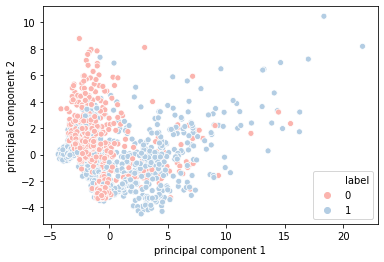

In [22]:
import seaborn as sns

sns.scatterplot(x='principal component 1', y='principal component 2', data=principalDF, hue=principalDF.label, palette='Pastel1')

In [23]:
pca.components_

array([[ 0.20714669,  0.25580633,  0.25411432,  0.12667376,  0.12766605,
         0.20444384,  0.20738905,  0.26320841,  0.20750972,  0.25976568,
         0.24908232,  0.23922664, -0.20062593, -0.17359766, -0.21725916,
         0.21022078,  0.21537827,  0.14818594,  0.18751669,  0.06364657,
        -0.01192152,  0.20763735,  0.08751515,  0.12515858,  0.20901357,
         0.17353312, -0.01192152,  0.03123093],
       [-0.26576793,  0.11648583,  0.00400413,  0.06370952,  0.06160664,
         0.04369018,  0.03543831,  0.01705132, -0.26480724,  0.10552217,
         0.05821469,  0.15853055,  0.27507834,  0.30191743,  0.25130602,
         0.20376648,  0.07925031,  0.00237284,  0.13236249,  0.08321996,
         0.36195249,  0.10319422,  0.3115278 , -0.24807173, -0.04713808,
         0.22144151,  0.36195249, -0.09974419]])

In [24]:
print("Explained Variance: ", (pca.explained_variance_))
print("Explained Variance Ratio: ", (pca.explained_variance_ratio_))

Explained Variance:  [11.58778021  5.00402104]
Explained Variance Ratio:  [0.41356564 0.17859255]


In [25]:
principalDF.label.value_counts()

1    919
0    540
Name: label, dtype: int64

In [26]:
def plot_2D_PCA(data):
    X = data.iloc[:, 3:]
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    pca = PCA(n_components=2).fit(X)
    X_pca = pca.transform(X)
    df_pca_after = pd.DataFrame(X_pca, columns=['principal component 1', 'principal component 2'])
    principalDF = df_pca_after
    principalDF['label'] = data.label.tolist()
    return sns.scatterplot(x='principal component 1', y='principal component 2', data=principalDF, hue=principalDF.label, palette='Pastel1')

In [27]:
pca_df.columns

Index(['Key', 'interval_index', 'interval_start_time', 'mean_nni', 'sdnn',
       'sdsd', 'nni_50', 'pnni_50', 'nni_20', 'pnni_20', 'rmssd', 'median_nni',
       'range_nni', 'cvsd', 'cvnni', 'mean_hr', 'max_hr', 'min_hr', 'std_hr',
       'lf', 'hf', 'vlf', 'lf_hf_ratio', 'csi', 'cvi', 'Modified_csi',
       'sampen', 'sd1', 'sd2', 'ratio_sd2_sd1', 'label'],
      dtype='object')

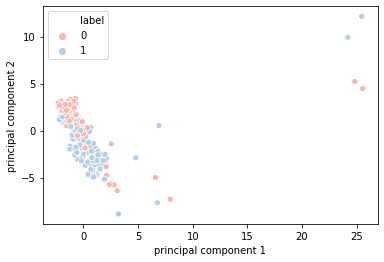

In [28]:
plot_2D_PCA(pca_df[pca_df.Key == pca_df.Key.unique().tolist()[4]])